In [1]:
import pandas as pd

In [2]:
df = pd.read_json("Sarcasm_Headlines_Dataset.json", lines = True)

In [3]:
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [4]:
df = df.drop(['article_link'],axis = 1)

In [5]:
import nltk  #importing natural language toolkit for natural language processing
from nltk.corpus import stopwords 

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/turjoy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
from nltk.stem.porter import PorterStemmer #importing porterStemmer  for word stemming thrugh porterstemmer algorithm 
from sklearn.feature_extraction.text import CountVectorizer #importing countvectorizer for feature extractions
import re # re library for regular expressions

In [8]:
corpus = []
for i in range(0, 26709):
    headline = re.sub('[^a-zA-z]',' ',df['headline'][i]) #substitute all non-alphabatic letters through space
    headline = headline.lower() #converting all letters into lowercase letters
    headline = headline.split() #For tokenizing a sentence into word by word
    ps = PorterStemmer() 
    headline = [ps.stem(word) for word in headline if not word in set(stopwords.words('english')) ] #Stemming tokenized word through porterstemming
    headline = ' '.join(headline)#joining all tokenizing word of a sentence again after stemming
    corpus.append(headline) #appends all words into a corpus list

In [9]:
cv = CountVectorizer(max_features = 3000)
x = cv.fit_transform(corpus).toarray() #convert string corpus list into a numeric array through countvectorizer
y = df.iloc[:,-1].values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 26)

In [12]:
from sklearn import naive_bayes
from sklearn.naive_bayes import MultinomialNB

In [13]:
clf = naive_bayes.MultinomialNB()
clf.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [14]:
import pylab as pl
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix


[[2365  647]
 [ 602 1728]]


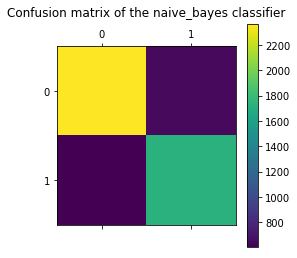

In [15]:
y_expect = y_test
y_predict = clf.predict(x_test)
cm = confusion_matrix(y_expect, y_predict)
pl.matshow(cm)
print (cm)
pl.title('Confusion matrix of the naive_bayes classifier\n')
pl.colorbar()
pl.show()


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_expect,y_predict))
print (accuracy_score(y_expect, y_predict)*100)

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      3012
           1       0.73      0.74      0.73      2330

   micro avg       0.77      0.77      0.77      5342
   macro avg       0.76      0.76      0.76      5342
weighted avg       0.77      0.77      0.77      5342

76.61924372894046


In [17]:
import numpy as np

In [18]:
review_array=np.array(["gourmet gifts for the foodie 2014"])
review_vector = cv.transform(review_array )
print (clf.predict(review_vector))
review_array=np.array(["israeli ban targeting boycott supporters raises alarm abroad"])
review_vector = cv.transform(review_array )
print (clf.predict(review_vector))
review_array=np.array(["boehner just wants wife to listen, not come up with alternative debt-reduction ideas"])
review_vector = cv.transform(review_array )
print (clf.predict(review_vector))
review_array=np.array(["mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697"])
review_vector = cv.transform(review_array )
print (clf.predict(review_vector))
review_array=np.array(["j.k. rowling wishes snape happy birthday in the most magical way"])
review_vector = cv.transform(review_array )
print (clf.predict(review_vector))

[0]
[0]
[1]
[0]
[0]


In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
clf_tree = DecisionTreeClassifier(random_state = 26,max_depth = 3)

In [21]:
clf_tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=26,
            splitter='best')

[[2942   70]
 [2016  314]]


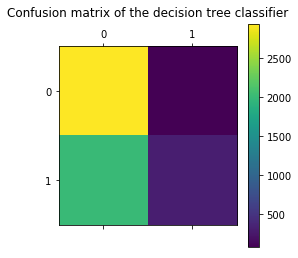

In [22]:
y_expect = y_test
y_predict = clf_tree.predict(x_test)
cmt = confusion_matrix(y_expect, y_predict)
pl.matshow(cmt)
print (cmt)
pl.title('Confusion matrix of the decision tree classifier\n')
pl.colorbar()
pl.show()

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_expect,y_predict))
print (accuracy_score(y_expect, y_predict)*100)

              precision    recall  f1-score   support

           0       0.59      0.98      0.74      3012
           1       0.82      0.13      0.23      2330

   micro avg       0.61      0.61      0.61      5342
   macro avg       0.71      0.56      0.48      5342
weighted avg       0.69      0.61      0.52      5342

60.95095469861476


In [24]:
from sklearn.tree import export_graphviz

In [25]:
export_graphviz(clf_tree,out_file='tree.dot', 
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [26]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

0

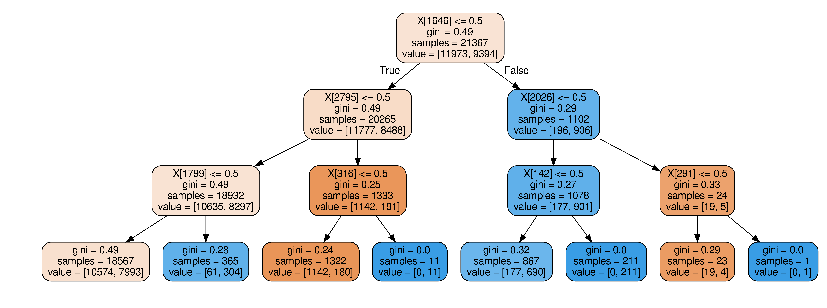

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree.png'))
plt.axis('off');
plt.show();

In [28]:
review_array=np.array(["gourmet gifts for the foodie 2014"])
review_vector = cv.transform(review_array )
print (clf_tree.predict(review_vector))
review_array=np.array(["israeli ban targeting boycott supporters raises alarm abroad"])
review_vector = cv.transform(review_array )
print (clf_tree.predict(review_vector))
review_array=np.array(["boehner just wants wife to listen, not come up with alternative debt-reduction ideas"])
review_vector = cv.transform(review_array )
print (clf_tree.predict(review_vector))
review_array=np.array(["mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697"])
review_vector = cv.transform(review_array )
print (clf_tree.predict(review_vector))
review_array=np.array(["j.k. rowling wishes snape happy birthday in the most magical way"])
review_vector = cv.transform(review_array )
print (clf_tree.predict(review_vector))

[0]
[0]
[0]
[0]
[0]


In [29]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [30]:
classifier = Sequential()
classifier.add(Dense(700,kernel_initializer = 'uniform',activation='relu',input_dim=3000))
classifier.add(Dense(350,kernel_initializer = 'uniform',activation='relu'))
classifier.add(Dense(175, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(80, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(40, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(20, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(10, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [31]:
classifier.compile(optimizer='adam',loss ='binary_crossentropy',metrics=['accuracy'])
classifier.fit(x_train,y_train,epochs=10,batch_size=50)

Epoch 1/10
21367/21367 [==============================] - 36s 2ms/step - loss: 0.5571 - acc: 0.6916
Epoch 2/10
21367/21367 [==============================] - 36s 2ms/step - loss: 0.3702 - acc: 0.8332
Epoch 3/10
21367/21367 [==============================] - 36s 2ms/step - loss: 0.1918 - acc: 0.9213
Epoch 4/10
21367/21367 [==============================] - 40s 2ms/step - loss: 0.0454 - acc: 0.9829
Epoch 5/10
21367/21367 [==============================] - 41s 2ms/step - loss: 0.0141 - acc: 0.9944
Epoch 6/10
21367/21367 [==============================] - 40s 2ms/step - loss: 0.0098 - acc: 0.9959
Epoch 7/10
21367/21367 [==============================] - 45s 2ms/step - loss: 0.0070 - acc: 0.9964
Epoch 8/10
21367/21367 [==============================] - 39s 2ms/step - loss: 0.0060 - acc: 0.9970
Epoch 9/10
21367/21367 [==============================] - 43s 2ms/step - loss: 0.0047 - acc: 0.9972
Epoch 10/10
21367/21367 [==============================] - 46s 2ms/step - loss: 0.0045 - acc: 0.9972

[[2495  517]
 [ 659 1671]]


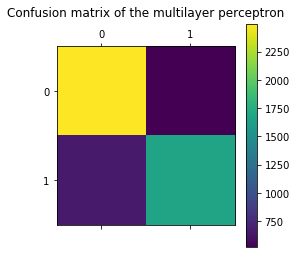

In [32]:
y_expect = y_test
y_predict = classifier.predict(x_test)
y_predict = (y_predict > 0.5)
cmn = confusion_matrix(y_expect, y_predict)
pl.matshow(cmn)
print (cmn)
pl.title('Confusion matrix of the multilayer perceptron\n')
pl.colorbar()
pl.show()

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_expect,y_predict))
print (accuracy_score(y_expect, y_predict)*100)

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      3012
           1       0.76      0.72      0.74      2330

   micro avg       0.78      0.78      0.78      5342
   macro avg       0.78      0.77      0.77      5342
weighted avg       0.78      0.78      0.78      5342

77.98577311868215


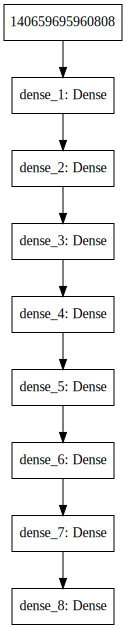

In [34]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(classifier).create(prog='dot', format='svg'))